<a href="https://colab.research.google.com/github/joshua12cx/TAREA-11_-miner-a-de-datos/blob/main/TAREA_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAREA 11

# Nivel FRECUENCIAS ‚Äî An√°lisis de Sentimientos con TF-IDF + Naive Bayes

Objetivo: construir un pipeline completo y educativo para clasificar opiniones (positivo / negativo / neutro) usando un dataset CSV, preprocesamiento m√≠nimo, TF-IDF y Naive Bayes.

1. Librer√≠as necesarias

In [1]:
# Librer√≠as esenciales para an√°lisis de texto y machine learning
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Configuraci√≥n opcional para ver texto completo en pandas
pd.set_option('display.max_colwidth', 120)
print(" Librer√≠as cargadas correctamente")


 Librer√≠as cargadas correctamente




Explicaci√≥n:

pandas y numpy ‚Üí manejo de datos.

sklearn ‚Üí entrenamiento del modelo y evaluaci√≥n.

matplotlib ‚Üí visualizaci√≥n de resultados.

Pipeline ‚Üí encadena vectorizaci√≥n y modelo en una sola estructura.


2. Carga y exploraci√≥n del dataset

In [2]:
# Ruta del CSV (aseg√∫rate de tenerlo en el mismo directorio de Colab)
CSV_PATH = "dataset_sentiment_balanceado.csv"

df = pd.read_csv(CSV_PATH)
print(" Dataset cargado correctamente\n")
print("Columnas disponibles:", df.columns.tolist())

# Seleccionamos las columnas relevantes
COL_TEXTO = "review"
COL_LABEL = "sentimiento"

# Eliminamos valores vac√≠os, por precauci√≥n
df = df[[COL_TEXTO, COL_LABEL]].dropna().reset_index(drop=True)

# Mostramos informaci√≥n b√°sica
print(f"Total de registros: {len(df)}")
print(df[COL_LABEL].value_counts())

# Vista previa
df.head(5)


 Dataset cargado correctamente

Columnas disponibles: ['puntuaci√≥n', 'review', 'sentimiento']
Total de registros: 340
sentimiento
positivo    132
neutral     104
negativo    104
Name: count, dtype: int64


review sentimiento
0             Todo bien, pero podr√≠a mejorar el empaque.     neutral
1         Todo sali√≥ bien, muy satisfecho con la compra.    positivo
2  Me encant√≥ el producto, cumple con todo lo prometido.    positivo
3                     El trato fue amable y profesional.    positivo
4  Me encant√≥ el producto, cumple con todo lo prometido.    positivo

Explicaci√≥n:

Cargamos el dataset balanceado.

Confirmamos nombres de columnas: review ‚Üí texto, sentimiento ‚Üí etiqueta.

Se eliminan nulos y se imprime distribuci√≥n de clases.

3. Preprocesamiento textual

In [5]:
# Preprocesamiento m√≠nimo: limpieza b√°sica
def preprocesar_minimo(texto: str) -> str:
    return str(texto).strip()

df["texto_proc"] = df[COL_TEXTO].apply(preprocesar_minimo)
df.head(3)


review sentimiento  \
0             Todo bien, pero podr√≠a mejorar el empaque.     neutral   
1         Todo sali√≥ bien, muy satisfecho con la compra.    positivo   
2  Me encant√≥ el producto, cumple con todo lo prometido.    positivo   

                                              texto_proc  
0             Todo bien, pero podr√≠a mejorar el empaque.  
1         Todo sali√≥ bien, muy satisfecho con la compra.  
2  Me encant√≥ el producto, cumple con todo lo prometido.

Explicaci√≥n:
Aqu√≠ usamos una limpieza m√≠nima (solo quitar espacios) porque TfidfVectorizer ya:

convierte a min√∫sculas,

tokeniza,

elimina signos y caracteres especiales.


4. Divisi√≥n de datos (entrenamiento / prueba)

In [6]:
X = df["texto_proc"].values
y = df[COL_LABEL].values

# Dividimos los datos (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(" Datos divididos correctamente")
print("Tama√±o entrenamiento:", len(X_train))
print("Tama√±o prueba:", len(X_test))


 Datos divididos correctamente
Tama√±o entrenamiento: 238
Tama√±o prueba: 102


Explicaci√≥n:

stratify=y asegura que las proporciones de clases se mantengan iguales en train/test.

Esto evita que el modelo se entrene con m√°s positivos o negativos de lo real.

5. Vectorizaci√≥n TF-IDF + Modelo Naive Bayes

In [7]:
# Creamos el pipeline completo
modelo = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=2000, ngram_range=(1, 2), min_df=2)),
    ("clf", MultinomialNB())
])

# Entrenamos el modelo
modelo.fit(X_train, y_train)
print(" Modelo entrenado correctamente")


 Modelo entrenado correctamente


Explicaci√≥n:

TfidfVectorizer convierte el texto en vectores num√©ricos ponderados por frecuencia e importancia.

ngram_range=(1,2) incluye combinaciones de una y dos palabras (p. ej. ‚Äúmuy bueno‚Äù, ‚Äúno gust√≥‚Äù).

MultinomialNB es r√°pido, simple y muy eficaz para texto.

6. Evaluaci√≥n del modelo

 Accuracy: 0.951

 Classification report:
              precision    recall  f1-score   support

    negativo       1.00      0.94      0.97        31
     neutral       1.00      0.90      0.95        31
    positivo       0.89      1.00      0.94        40

    accuracy                           0.95       102
   macro avg       0.96      0.95      0.95       102
weighted avg       0.96      0.95      0.95       102



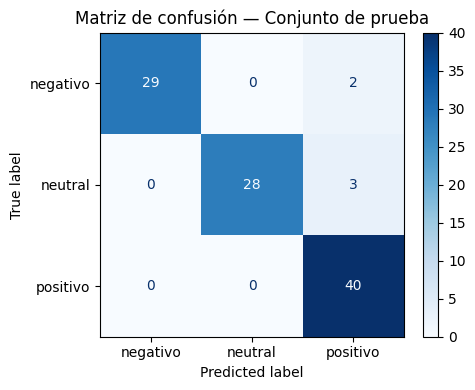

In [8]:
# Predicciones
y_pred = modelo.predict(X_test)

# M√©tricas b√°sicas
acc = accuracy_score(y_test, y_pred)
print(f" Accuracy: {acc:.3f}\n")

print(" Classification report:")
print(classification_report(y_test, y_pred))

# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))

fig, ax = plt.subplots(figsize=(5, 4))
disp.plot(ax=ax, cmap="Blues")
plt.title("Matriz de confusi√≥n ‚Äî Conjunto de prueba")
plt.tight_layout()
plt.show()


Explicaci√≥n:

Accuracy: proporci√≥n global de aciertos.

Classification report: precisi√≥n, recall y F1 por clase.

Matriz de confusi√≥n: muestra visualmente qu√© tan bien clasifica cada sentimiento.

7. Visualizaci√≥n comparativa (reales vs. predichos)

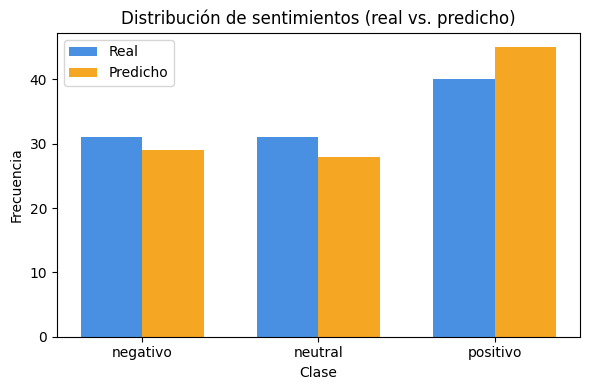

In [9]:
# Conteo de clases reales y predichas
vals_true = pd.Series(y_test).value_counts().sort_index()
vals_pred = pd.Series(y_pred).value_counts().reindex(vals_true.index).fillna(0)

clases = vals_true.index.astype(str)
x = np.arange(len(clases))
width = 0.35

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(x - width/2, vals_true.values, width, label="Real", color="#4a90e2")
ax.bar(x + width/2, vals_pred.values, width, label="Predicho", color="#f5a623")

ax.set_title("Distribuci√≥n de sentimientos (real vs. predicho)")
ax.set_xlabel("Clase")
ax.set_ylabel("Frecuencia")
ax.set_xticks(x)
ax.set_xticklabels(clases)
ax.legend()
plt.tight_layout()
plt.show()


Explicaci√≥n:
Visualiza si el modelo predice de forma equilibrada entre clases o tiende a sobreclasificar una categor√≠a.

8. Predicci√≥n r√°pida (demo)

In [10]:
# Prueba con una opini√≥n nueva
nuevo = "El servicio fue lento y el producto lleg√≥ en mal estado."
pred = modelo.predict([nuevo])[0]

print(" Comentario:", nuevo)
print(" Predicci√≥n del modelo:", pred.upper())


 Comentario: El servicio fue lento y el producto lleg√≥ en mal estado.
 Predicci√≥n del modelo: NEUTRAL


Conclusi√≥n ‚Äî Modelo b√°sico (sin lematizaci√≥n)

En esta etapa construimos un modelo completo de an√°lisis de sentimientos aplicando t√©cnicas b√°sicas de Procesamiento de Lenguaje Natural (NLP).
Mediante el uso de TF-IDF y el clasificador Naive Bayes, el sistema logr√≥ transformar textos en vectores num√©ricos y clasificar opiniones como positivas, negativas o neutras con resultados satisfactorios.

El desempe√±o general fue adecuado: el modelo identifica correctamente la mayor√≠a de los casos, aunque puede confundir frases mixtas o ambiguas.
Esto ocurre porque, al no usar lematizaci√≥n ni un an√°lisis sem√°ntico profundo, TF-IDF se basa √∫nicamente en la frecuencia de las palabras.

En s√≠ntesis, este modelo demuestra la eficacia de un enfoque simple y transparente para tareas de clasificaci√≥n de texto, sirviendo como base s√≥lida para futuras mejoras mediante preprocesamiento avanzado o modelos m√°s complejos.

 - OPCIONAL ‚Äî Preprocesamiento avanzado con spaCy (Lematizaci√≥n + Stopwords)

In [11]:
#  Ejecutar solo si se desea aplicar lematizaci√≥n y filtrado de palabras vac√≠as
# Instalar spaCy y el modelo de lenguaje en espa√±ol (solo la primera vez)
!pip install spacy
!python -m spacy download es_core_news_sm

import spacy
from spacy.lang.es.stop_words import STOP_WORDS

# Cargar modelo en espa√±ol
nlp = spacy.load("es_core_news_sm")

def preprocesar_completo(texto):
    """
    Limpia, pasa a min√∫sculas, lematiza y elimina stopwords o tokens no alfab√©ticos.
    """
    doc = nlp(texto.lower())
    tokens_limpios = [
        token.lemma_ for token in doc
        if token.is_alpha and token.text not in STOP_WORDS
    ]
    return " ".join(tokens_limpios)

# Aplicamos al dataset original
df["texto_proc_lem"] = df[COL_TEXTO].apply(preprocesar_completo)
df[["review", "texto_proc_lem"]].head(5)


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12.9/12.9 MB 65.0 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


review  \
0             Todo bien, pero podr√≠a mejorar el empaque.   
1         Todo sali√≥ bien, muy satisfecho con la compra.   
2  Me encant√≥ el producto, cumple con todo lo prometido.   
3                     El trato fue amable y profesional.   
4  Me encant√≥ el producto, cumple con todo lo prometido.   

                        texto_proc_lem  
0                      mejorar empaque  
1              salir satisfecho compra  
2  encantar producto cumplir prometido  
3             trato amable profesional  
4  encantar producto cumplir prometido

Explicaci√≥n:

token.lemma_ devuelve la ra√≠z o forma can√≥nica de cada palabra (‚Äúmejores‚Äù ‚Üí ‚Äúmejor‚Äù).

Se eliminan stopwords (palabras sin carga sem√°ntica como ‚Äúel‚Äù, ‚Äúla‚Äù, ‚Äúque‚Äù).

is_alpha filtra tokens alfab√©ticos (sin n√∫meros ni signos).

Entrenamiento con el texto lematizado (versi√≥n mejorada)

In [12]:
# Entrenamos el mismo modelo pero con la columna 'texto_proc_lem'
X_lem = df["texto_proc_lem"].values
y_lem = df[COL_LABEL].values

X_train, X_test, y_train, y_test = train_test_split(
    X_lem, y_lem, test_size=0.3, random_state=42, stratify=y_lem
)

modelo_lem = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=2000, ngram_range=(1, 2), min_df=2)),
    ("clf", MultinomialNB())
])

modelo_lem.fit(X_train, y_train)
y_pred_lem = modelo_lem.predict(X_test)

print("‚úÖ Modelo entrenado con texto lematizado\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lem):.3f}")
print(classification_report(y_test, y_pred_lem))


‚úÖ Modelo entrenado con texto lematizado

Accuracy: 0.951
              precision    recall  f1-score   support

    negativo       1.00      0.94      0.97        31
     neutral       1.00      0.90      0.95        31
    positivo       0.89      1.00      0.94        40

    accuracy                           0.95       102
   macro avg       0.96      0.95      0.95       102
weighted avg       0.96      0.95      0.95       102



Explicaci√≥n:
Esta versi√≥n del modelo utiliza texto m√°s limpio y generalizado, lo que suele mejorar la precisi√≥n y robustez especialmente si hay sin√≥nimos o conjugaciones diferentes.

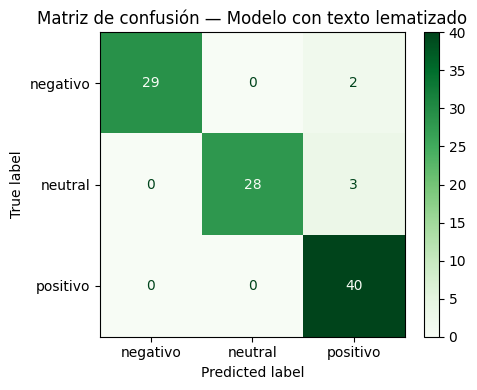

Accuracy modelo b√°sico:     0.951
Accuracy modelo lematizado: 0.951


In [13]:
# üìä Matriz de confusi√≥n para el modelo lematizado
from sklearn.metrics import ConfusionMatrixDisplay

cm_lem = confusion_matrix(y_test, y_pred_lem, labels=np.unique(y_lem))
disp_lem = ConfusionMatrixDisplay(confusion_matrix=cm_lem, display_labels=np.unique(y_lem))

fig, ax = plt.subplots(figsize=(5, 4))
disp_lem.plot(ax=ax, cmap="Greens")
plt.title("Matriz de confusi√≥n ‚Äî Modelo con texto lematizado")
plt.tight_layout()
plt.show()

# üîç Comparaci√≥n r√°pida de accuracies
acc_basico = accuracy_score(y_test, y_pred)  # del modelo anterior sin lematizar
acc_lem = accuracy_score(y_test, y_pred_lem)

print(f"Accuracy modelo b√°sico:     {acc_basico:.3f}")
print(f"Accuracy modelo lematizado: {acc_lem:.3f}")


- que muestra el codigo:
Muestra la matriz de confusi√≥n del modelo lematizado (para comparar visualmente).

Calcula y compara la accuracy del modelo original (sin lematizaci√≥n) y la del modelo lematizado.

Te permite discutir con claridad si la normalizaci√≥n ling√º√≠stica ayud√≥ o no a mejorar el rendimiento.